Assignment 4  
Nick Brown

# Problem 1: Geary Khamis Dollars

In [2]:
import numpy as np
import pandas as pd
import math

np.random.seed(1) # setting seed for replication

N = 4 # number of goods in the economy
C = 2 # number of countries, in this case the United States and Soviet Union
Year = 5 # number of years that we are simulating 
Type = 2 # types: Values and Prices

# watched the lecture video from Thursday (and saw some of Fisher's solution) to get a sense of how to approach this problem. 
# Changed country names, seed, and shocks as well as figures and scales

Names = ['USA', 'USSR'] # country names
Year_names = ['2016','2017','2018','2019','2020'] # years, obviously in an alternate reality where USSR still exists
Type_names = ['Values','Prices']

# Pseudo Data
# quantities
scale1 = 100
q_base = [scale1*np.random.rand(N) for i in range(int(C))] # initial base quantity

# adding in growth
growth = [0.06,0.0] # growth for country 1 (USA), no growth for country 2 (USSR)

# adding growth to base quantity using Python's list comprehension
quantities = [[q_base[j]*(1+growth[j])**i for i in range(int(Year))] for j in range(int(C))]
Quantities = np.array(quantities) # coverting to numpy array, easier to use than list

# Now generating prices
scale = [10,60] # scale for base prices. Scale is 6 times greater for USSR
p_base = [scale[i]*np.random.rand(N) for i in range(int(C))]

# now adding inflation and price shocks for future years
inflation = [0.03, 0.05] # yearly inflation, both countries face inflation
scale = [0.1, 0.1] # used for determining price shocks

# adding inflation and price shocks to base prices
prices = [[p_base[j]*(1+inflation[j])**i + scale[j]*np.random.rand(N) for i in range(int(Year))] for j in range(int(C))]
prices = np.array(prices)

# create values (multiplying prices with quantities)
values = prices*Quantities

# getting some nice looking tables (like how Fisher did)
data = np.array([values, prices])
for i in range(int(C)):
    for j in range(int(Type)):
        print(Names[i], Type_names[j])
        print(pd.DataFrame (data[j,i,:,:],columns=range(N), index = Year_names))

USA Values
               0           1         2           3
2016  167.201020  392.147271  0.048106  207.763100
2017  184.189704  431.145675  0.052727  228.400549
2018  201.340203  469.893617  0.057261  247.078008
2019  216.183313  512.658352  0.062533  271.131258
2020  240.151096  556.343617  0.069126  295.569856
USA Prices
             0         1         2         3
2016  4.009405  5.444036  4.205984  6.872005
2017  4.166779  5.646639  4.349046  7.126993
2018  4.296945  5.805767  4.455739  7.273399
2019  4.352568  5.975610  4.590486  7.529689
2020  4.561442  6.117746  4.787259  7.743757
USSR Values
               0           1          2            3
2016  181.034913  487.275462  30.641377  1392.715646
2017  190.480016  511.520865  32.660035  1462.357053
2018  198.631734  536.785099  35.436915  1533.625710
2019  208.826584  563.310163  35.467864  1611.587438
2020  219.135046  591.594804  38.118986  1689.888132
USSR Prices
              0          1         2          3
2016  12.335

In [3]:
# time to work with the pseudo data, and get the figures we are looking for
Values = data[0]
prices = data[1]

# concatenating the Quantities and values variables
Quantities = np.concatenate([Quantities[0,:,:],Quantities[1,:,:]])
Values = np.concatenate([data[0,0,:,:],data[0,1,:,:]])

# this is pure Fisher code, slightly adapted from lecture notebook
c_one = np.ones((N,1))  #this is a column vector of ones
r_ones = np.ones((1,C*Year)) #row vector of ones, accounting for years

GDP = np.dot(Values, c_one) # this is how to do matrix multiplication in Python
World_Q = np.dot(r_ones, Quantities)

GDP_shares = np.divide(Values, GDP) #it knows to divide by columns
Q_shares =  np.divide(Quantities, World_Q) #it knows to divide by rows

M=np.zeros((C*Year,C*Year))# dummy array

# filling the dummy array with the values
for i in range(C*Year):
    for j in range(C*Year):
        M[i,j] = np.dot(np.multiply(GDP_shares[i,:],Q_shares[j,:]),c_one)
        
        
I = np.identity(C*Year) 
R = np.zeros((C*Year,C*Year))
R[:,0] = 1  # see Balk
r = np.zeros(C*Year)
r[0] = 1 #see Balk

Q_GK = np.dot(r,np.linalg.inv(M - I + R))
PPP_GK = np.divide(np.transpose(GDP),Q_GK)
World_Prices = np.divide(np.dot(Q_GK,GDP_shares),World_Q)

In [4]:
# Table Time
results = np.zeros((5,4))

results[:,0] = Q_GK[0:5]
results[:,1] = Q_GK[5:10]
results[:,2] = PPP_GK[0,0:5]
results[:,3] = PPP_GK[0,5:10]

# rounding the decimal points to 2
pd.options.display.float_format = '{:,.3f}'.format
Names = ['GK-Growth USA','GK-Growth USSR','GK-Price Levels USA','GK-Price Levels USSR']
c_y = ['2016','2017','2018','2019','2020']

df1 = pd.DataFrame(results, columns=Names, index = c_y)

exchange_rate = PPP_GK[0,5:10] / PPP_GK[0,0:5] # the exchange rate defined as the amount of rubles it takes to buy a dollar

Name = ['PPP Exchange Rate']

df2 = pd.DataFrame(exchange_rate, columns=Name, index=Year_names)

# Getting the growth rates for both countries, taking the log to easily get percentage growth
USAgrowth = np.insert([(np.log(Q_GK[1:5])-np.log(Q_GK[:4]))],0,math.nan) # inserting a NaN for the growth rate in the first year
USSRgrowth = np.insert([(np.log(Q_GK[6:10])-np.log(Q_GK[5:9]))],0,math.nan)

df2['USA Growth'] = USAgrowth
df2['USSR Growth'] = USSRgrowth
df2['Relative Size of the United States'] = Q_GK[0:5]/Q_GK[5:10] # the relative size of USA compared to USSR

## Table 1

In [5]:
df1

,GK-Growth USA,GK-Growth USSR,GK-Price Levels USA,GK-Price Levels USSR
2016,0.127,0.057,"6,040.820","36,810.582"
2017,0.135,0.057,"6,268.131","38,664.613"
2018,0.143,0.057,"6,435.996","40,555.793"
2019,0.151,0.057,"6,611.623","42,574.583"
2020,0.160,0.057,"6,811.811","44,678.416"


We can see that price levels appear to be growing much faster in the USSR than they are in the United States. This is in line with our code as the US has 3% yearly inflation while the USSR suffers from 5% yearly inflation (this is not accounting for the price shocks that were also applied). Nonetheless, in both cases we can clearly see the price levels are rising over time. We can see that the US also appears to have some sort of growth, while the USSR appears have be stagnant (see columns 1 and 2).

## Table 2

In [6]:
df2

,PPP Exchange Rate,USA Growth,USSR Growth,Relative Size of the United States
2016,6.094,NaN,NaN,2.235
2017,6.168,0.058,0.000,2.369
2018,6.301,0.058,0.000,2.511
2019,6.439,0.058,-0.000,2.662
2020,6.559,0.058,0.000,2.822


As we can see from the table 2, the United States is experiencing about 6% growth each year (log puts it in percent terms), while the USSR is stagnating with 0% growth. The PPP exchange rate is growing each year. It looks like it takes around 6 rubles to buy a dollar in 2016, and then around 6.56 rubles to buy a dollar in 2020. So the real exchange rate is increasing over time, as the dollar begins to become worth more. We can see the relative size of the United States appears to be at least 2 times greater than the USSR, and grows to about 2.8 times the size of the USSR by 2020.

# Problem 2: Ideal Rate of Saving (Three Periods)

In [7]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

K0 = 2 #intial capital
alpha = 0.33 # capital's share
A = 6 # Total factor productivity
Y1=A*K0**alpha  #GDP at time 1

#preference parameters
rho = 0.9 #elasticity of substitution
beta = 0.9 #discount factor

def f(c):
    """
    This is the utility function for a three-period model
    """
    if rho == 1:
        u = np.log(c[0]) + beta*np.log(c[1]) + (beta**2)*np.log(c[2])
    else: 
        u = (c[0]**(1-rho) +beta*c[1]**(1-rho))/(1-rho)+ beta**2*(c[2]**(1-rho)) / (1-rho)
    return -u

def MRS(c):
    """
    This is the marginal rate of substitution function for a three-period model
    """
    if rho == 1:
        MRS = [1/c[0], beta/c[1], (beta**2)/c[2]]
    else: 
        MRS =[c[0]**(-rho), beta*c[1]**(-rho), beta**2*c[2]**(-rho)]
    return MRS

x0 = [5, 5, 5] # initial guesses for optimization
bnds = ((0.5, 200), (0.5, 200), (0.5, 200))

cons = (
    {'type': 'ineq','fun' : lambda x: np.array([A*(Y1-x[0])**alpha - x[1]])},
    {'type': 'ineq','fun' : lambda x: np.array([A*(A*(Y1-x[0])**alpha - x[1])**alpha - x[2]])}
    )

from scipy import optimize as opt
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: -32.4669368838002
     jac: array([-0.21829414, -0.1822691 , -0.13587809])
 message: 'Optimization terminated successfully'
    nfev: 62
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([5.42473735, 5.89692354, 7.26883581])

In [8]:
c = cx['x']
prices = MRS(c)
prices = prices/prices[0]
Y2 = A*Y1**alpha
print('Present price vector is', np.round(prices,2))
print('Gross interest rates are', np.round([prices[0]/prices[1],prices[1]/prices[2]],3))
print('Consumption plan is', np.round(c,2))

Present price vector is [1.   0.83 0.62]
Gross interest rates are [1.198 1.341]
Consumption plan is [5.42 5.9  7.27]


Code appears to work. Debugged with Fisher, was able to fix the constraint and got results that make sense (interest rates and the consumption plan go up over time). Can now use this code in a function, that will make changing the parameters and evaluating the changes easier, less coding anyways. Wasn't sure how to adjust the code to get the "savings". Need to figure out how to get Y2.

In [9]:
def opt_save(A, beta, rho,K0, alpha):
    """
    Takes 5 parameters and returns the interest rates. 
    """
    
    Y1 = A*K0**alpha # GDP at period 1
    
    def f(c):
        """
        This is the utility function for a three-period model
        """
        if rho == 1:
            u = np.log(c[0]) + beta*np.log(c[1]) + (beta**2)*np.log(c[2])
        else: 
            u = (c[0]**(1-rho) +beta*c[1]**(1-rho))/(1-rho)+ beta**2*(c[2]**(1-rho)) / (1-rho)
        return -u
    
    def MRS(c):
        """
        This is the marginal rate of substitution function for a three-period model
        """
        if rho == 1:
            MRS = [1/c[0], beta/c[1], (beta**2)/c[2]]
        else: 
            MRS =[c[0]**(-rho), beta*c[1]**(-rho), beta**2*c[2]**(-rho)]
        return MRS
    
    x0 = [5, 5, 5] # initial guesses for optimization
    bnds = ((0.5, 200), (0.5, 200), (0.5, 200))
    
    cons = (
    {'type': 'ineq','fun' : lambda x: np.array([A*(Y1-x[0])**alpha - x[1]])},
    {'type': 'ineq','fun' : lambda x: np.array([A*(A*(Y1-x[0])**alpha - x[1])**alpha - x[2]])}
    )
    
    cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
    c = cx['x']
    
    prices = MRS(c)
    interest_rates = [prices[0]/prices[1], prices[1]/prices[2]]
    
    return (interest_rates)

### First Change (change in $\beta$)

In [10]:
# setting up the initial parameters, with a focus on beta (going to cycle through a couple of different values)
A  = 6
beta = [0.25, 0.50, 0.75, 0.9, 0.95, 1]
rho = 0.9
K0 = 2
alpha = 0.33
first_results = [opt_save(A,b,rho,K0,alpha) for b in beta]
first_results

# creating a data frame, easier to plot later
columns = ['1', '2']
data = pd.DataFrame(first_results, columns = columns)
data['Beta']= [0.25, 0.50, 0.75, 0.9, 0.95, 1]
data =pd.melt(data, id_vars=['Beta'], value_vars=['1', '2'], value_name='Gross_Interest_Rate',var_name='Time_Period')

In [11]:
data

,Beta,Time_Period,Gross_Interest_Rate
0,0.250,1,2.801
1,0.500,1,1.750
2,0.750,1,1.343
3,0.900,1,1.198
4,0.950,1,1.159
5,1.000,1,1.123
6,0.250,2,3.766
7,0.500,2,2.113
8,0.750,2,1.537
9,0.900,2,1.341


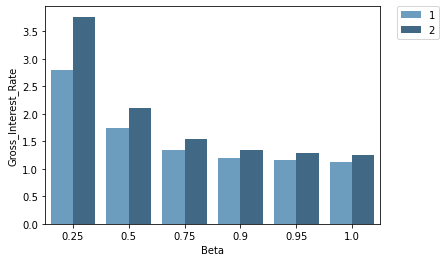

In [12]:
import seaborn as sns
# Seaborn makes nice plots from pandas data frames, typically using less code than straight matplotlib and colors look better
ax = sns.barplot(x='Beta', y='Gross_Interest_Rate', hue='Time_Period',data=data, palette = 'Blues_d')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # this keeps the legend off the plot

The $\beta$ represents the discount rate. When the discount rate is low (smaller $\beta$), we place more emphasis on present consumption as opposed to future consumption. The consumption plan is to spend more in time 0 and less in time 2. When the discount rate is high (larger $\beta$), we place more emphasis on future consumption, spend less in the present and save more. So the consumption plan is to spend less in time 0, save, and then spend more in time 1 and time 2.

### Second Change (change in $\rho$)

In [13]:
# setting up the initial parameters, with a focus on rho (going to cycle through a couple of different, lesser, values)
A  = 6
beta = 0.9
rho = [0, 0.25,0.5, 0.75,0.9, 1]
K0 = 2
alpha = 0.33
first_results = [opt_save(A,beta,r,K0,alpha) for r in rho]
first_results

# Creating a data frame, easier to plot it later this way
columns = ['1', '2']
data = pd.DataFrame(first_results, columns = columns)
data['Rho']= [0, 0.25,0.5, 0.75,0.9, 1]
data =pd.melt(data, id_vars=['Rho'], value_vars=['1', '2'],value_name='Gross_Interest_Rate', var_name='Time_Period')

In [14]:
data

,Rho,Time_Period,Gross_Interest_Rate
0,0.000,1,1.111
1,0.250,1,1.137
2,0.500,1,1.163
3,0.750,1,1.185
4,0.900,1,1.198
5,1.000,1,1.205
6,0.000,2,1.111
7,0.250,2,1.195
8,0.500,2,1.260
9,0.750,2,1.313


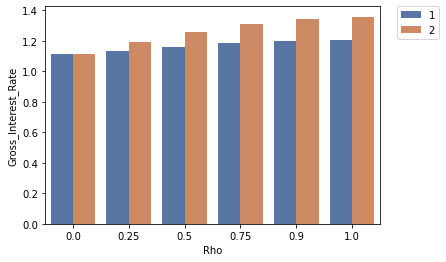

In [15]:
# Seaborn makes nice plots from pandas data frames, this time for change in rho
ax = sns.barplot(x='Rho', y='Gross_Interest_Rate', hue='Time_Period',data=data, palette = 'deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Increasing the $\rho$ parameter increases the gross interest rate at time 1 and time 2. $\rho$ represents the elasticity of substitution. If you become elastic to consuming now or later, you'd be more likely to save money and take advantage of interest rates. Consuming more later rather than now.

### Third and Final Change (change in $A$)

In [16]:
# setting up the initial parameters, with a focus on A (going to cycle through a couple of different, lesser, values)
A  = [5, 5.5, 6,10]
beta = 0.9
rho = 0.9
K0 = 2
alpha = 0.33
first_results = [opt_save(a,beta,rho,K0,alpha) for a in A]
first_results

# Creating a data frame, easier to plot it later this way
columns = ['1', '2']
data = pd.DataFrame(first_results, columns = columns)
data['A']= [5, 5.5, 6,10]
data =pd.melt(data, id_vars=['A'], value_vars=['1', '2'],value_name='Gross_Interest_Rate', var_name='Time_Period')

In [17]:
data # table is smaller, A values had a tendency to break the optimization function for whatever reason

,A,Time_Period,Gross_Interest_Rate
0,5.000,1,1.132
1,5.500,1,1.166
2,6.000,1,1.198
3,10.000,1,1.405
4,5.000,2,1.318
5,5.500,2,1.330
6,6.000,2,1.341
7,10.000,2,1.410


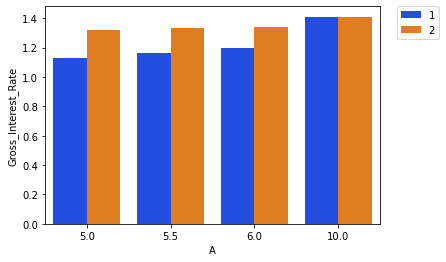

In [18]:
ax = sns.barplot(x='A', y='Gross_Interest_Rate', hue='Time_Period',data=data, palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Changing the $A$ parameter has a minor affect on the Gross Interest Rate. That makes sense since the A parameter just scales the constraint (see the constraints in the function opt_save). It only slightly changed the interest rate. So this result makes sense. 